# 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# 2. Load the Dataset

In [2]:
# Load the dataset
file_path = "Countries_and_continents_of_the_world.csv"
df = pd.read_csv(file_path)


# 3. Data Pre-Processing & Feature Selection

In [3]:
# data cleaning
# Convert numerical data stored as objects to float
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    try:
        df[col] = df[col].str.replace(',', '').astype(float)
    except ValueError:
        pass  # Ignoring non-numeric conversions


In [4]:
# Dropping columns with more than 30% missing values
threshold = 0.3 * len(df)  # 30% threshold
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Filling remaining missing values
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'float64':
        df_cleaned.loc[:, col] = df_cleaned[col].fillna(df_cleaned[col].median())
    elif df_cleaned[col].dtype == 'object':
        df_cleaned.loc[:, col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temp_coldestQuart                   236 non-null    float64
 1   temp_driestQuart                    236 non-null    float64
 2   Agriculture                         211 non-null    float64
 3   Country Name                        269 non-null    object 
 4   Net migration                       223 non-null    float64
 5   Coastline (coast/area ratio)        226 non-null    float64
 6   Capital                             243 non-null    object 
 7   accessibility_to_cities             237 non-null    float64
 8   Population 2020                     46 non-null     float64
 9   Population                          226 non-null    float64
 10  Climate_short_desc                  204 non-null    object 
 11  temp_annual_range                   236 non-n

In [6]:
df.describe(include='all')

,temp_coldestQuart,temp_driestQuart,Agriculture,Country Name,Net migration,Coastline (coast/area ratio),Capital,accessibility_to_cities,Population 2020,Population,...,cloudiness,geonumber,Region,Pop. Density (per sq. mi.),temp_seasonality,Area (sq. mi.),Geoname ID,Industry,climate_additional_description,climate
count,236.000000,236.000000,211.000000,269,223.000000,226.000000,243,237.000000,4.600000e+01,2.260000e+02,...,233.000000,265.000000,269,226.000000,236.000000,2.260000e+02,2.490000e+02,210.000000,242,269
unique,NaN,NaN,NaN,269,NaN,NaN,242,NaN,NaN,NaN,...,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,236,7
top,NaN,NaN,NaN,Afghanistan,NaN,NaN,Kingston,NaN,NaN,NaN,...,NaN,NaN,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,"tropical; always hot, humid",Savana/Sudan
freq,NaN,NaN,NaN,1,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,59,NaN,NaN,NaN,NaN,NaN,2,73
mean,13.343579,17.476764,107.578199,NaN,12.183857,2125.898230,NaN,913.304632,2.494231e+07,2.859019e+07,...,200.430719,19058.064688,NaN,3806.061947,38.801726,5.904961e+05,2.385470e+06,220.747619,NaN,NaN
std,12.212408,11.130117,126.628957,NaN,478.088882,7243.351952,NaN,2070.077240,5.334900e+07,1.181313e+08,...,56.325035,4816.014625,NaN,16637.044848,31.672845,1.790455e+06,1.544676e+06,171.856867,NaN,NaN
min,-28.506789,-19.847401,0.000000,NaN,-2099.000000,0.000000,NaN,0.969005,3.812800e+04,7.026000e+03,...,50.357229,1419.704640,NaN,0.000000,1.168763,2.000000e+00,4.951800e+04,1.000000,NaN,NaN
25%,2.862823,11.187788,16.000000,NaN,-69.000000,10.000000,NaN,73.434430,2.243103e+06,4.368775e+05,...,170.878720,16233.665573,NaN,297.250000,11.093533,4.407250e+03,1.168579e+06,38.250000,NaN,NaN
50%,18.526643,22.284416,55.000000,NaN,0.000000,76.000000,NaN,213.662956,8.075802e+06,4.724234e+06,...,205.807448,19083.973900,NaN,791.500000,29.912853,8.523500e+04,2.363686e+06,232.000000,NaN,NaN
75%,23.595530,25.236814,164.000000,NaN,90.500000,1035.750000,NaN,638.757539,1.574856e+07,1.712839e+07,...,237.885364,22759.294197,NaN,1909.750000,62.725459,4.294915e+05,3.474414e+06,312.000000,NaN,NaN


In [7]:
# Removing outliers (example: removing data points that are beyond 3 standard deviations)
for col in df_cleaned.select_dtypes(include='float64').columns:
    df_cleaned = df_cleaned[(np.abs(df_cleaned[col] - df_cleaned[col].mean()) <= (3*df_cleaned[col].std()))]


In [8]:
# Encoding categorical variables
label_encoders = {}
for col in df_cleaned.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le


# 4. Data Visualization

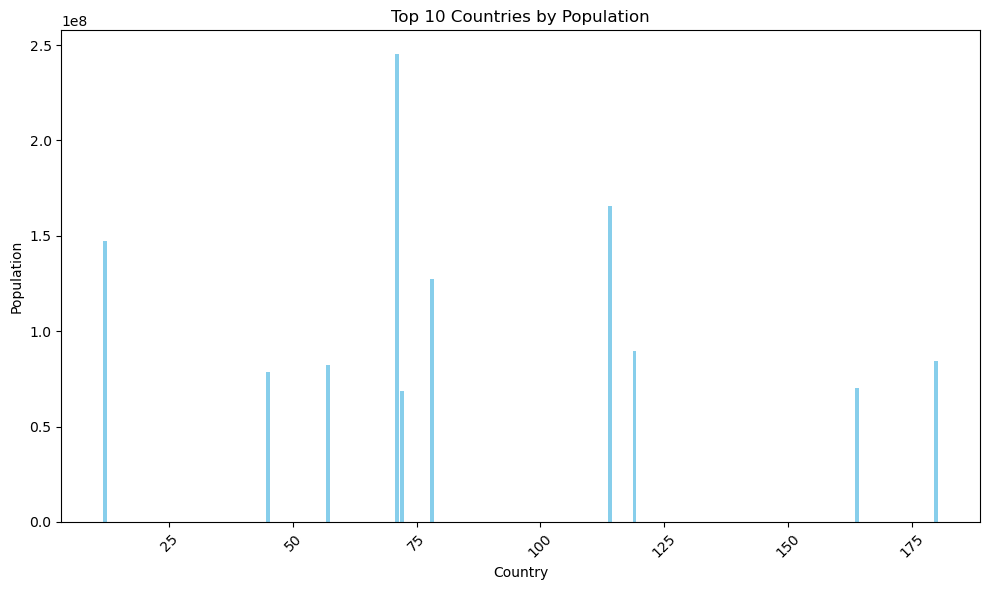

In [9]:
# Bar Chart: Top 10 countries by Population
top_countries_by_population = df_cleaned.nlargest(10, 'Population')[['Country Name', 'Population']]
plt.figure(figsize=(10, 6))
plt.bar(top_countries_by_population['Country Name'], top_countries_by_population['Population'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Countries by Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

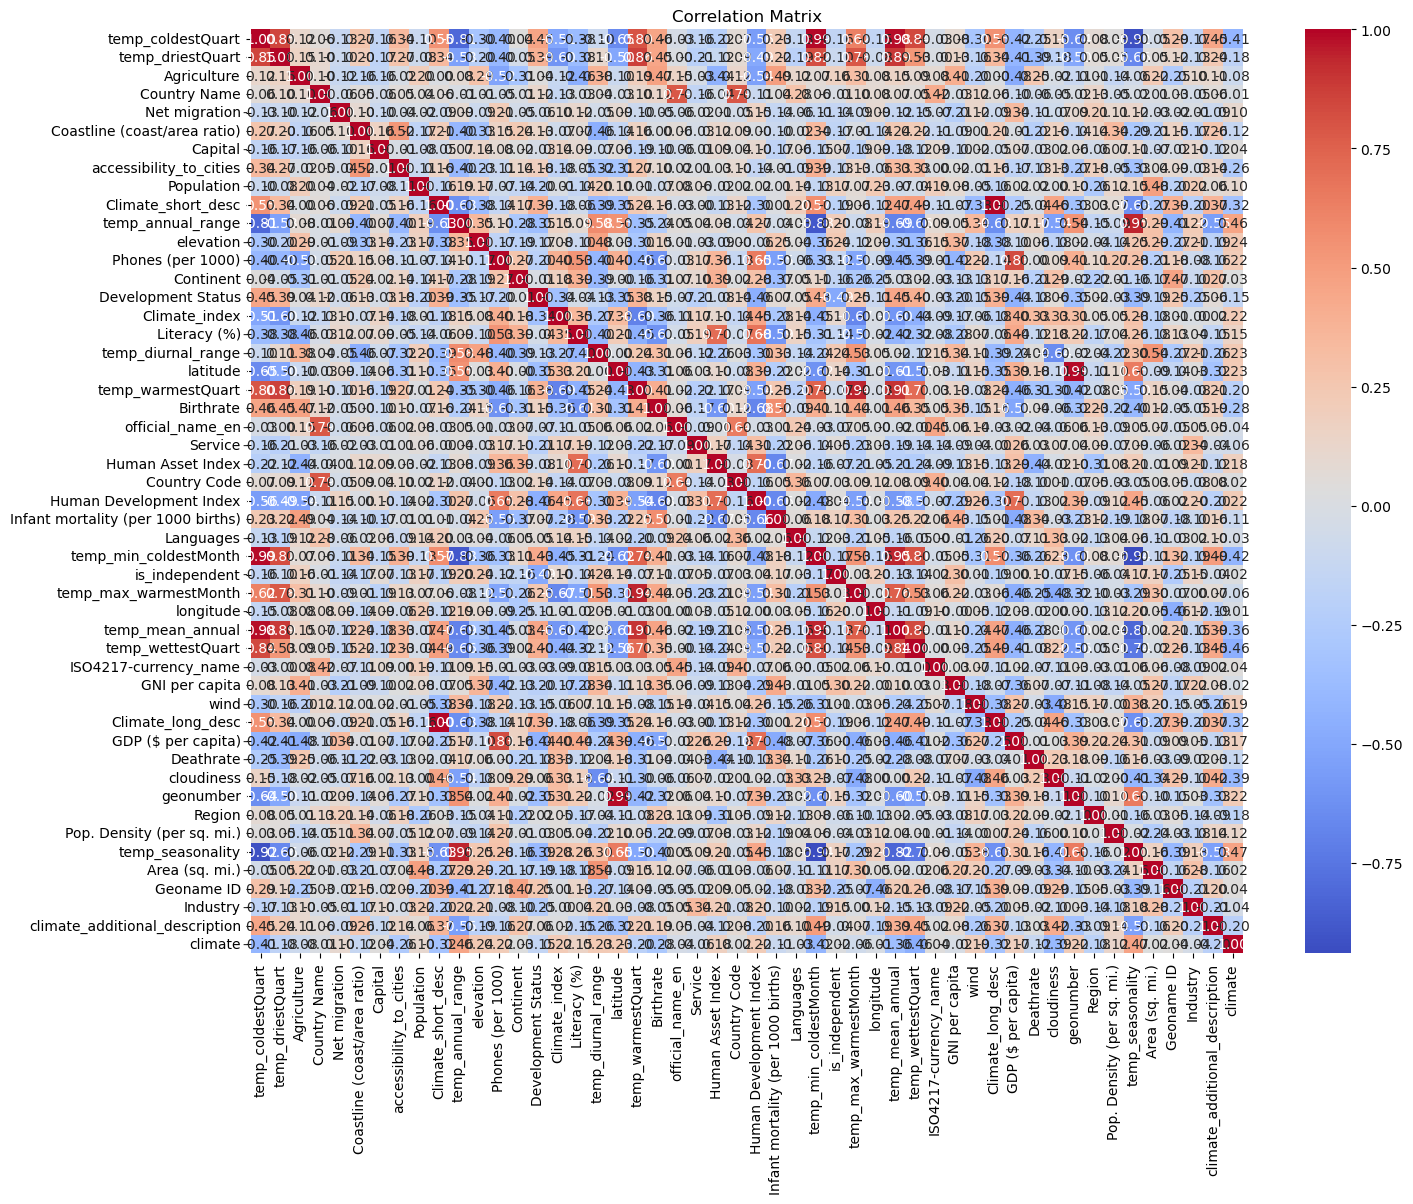

In [10]:
# Heat Map: Correlation matrix for numerical columns
plt.figure(figsize=(16,12))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


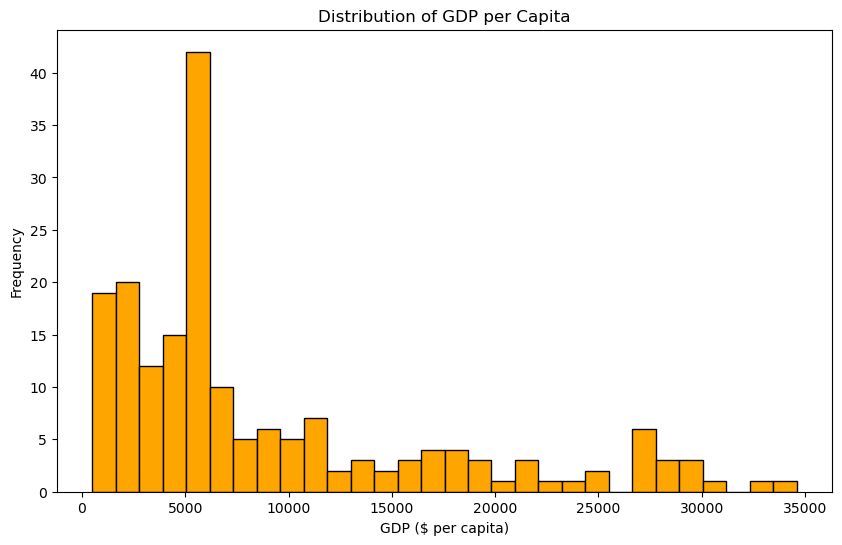

In [11]:
# Histogram: Distribution of GDP per capita
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['GDP ($ per capita)'], bins=30, color='orange', edgecolor='black')
plt.xlabel('GDP ($ per capita)')
plt.ylabel('Frequency')
plt.title('Distribution of GDP per Capita')
plt.show()

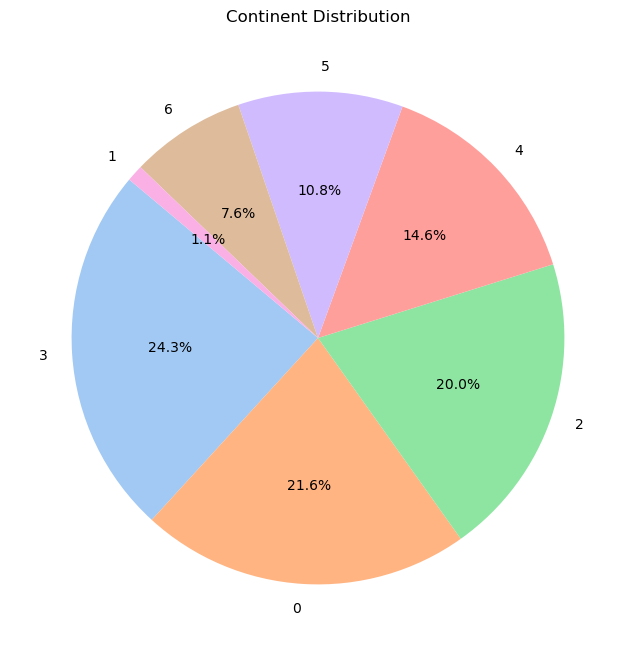

In [12]:
# Pie Chart: Continent distribution
continent_distribution = df_cleaned['Continent'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(continent_distribution, labels=continent_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Continent Distribution')
plt.show()

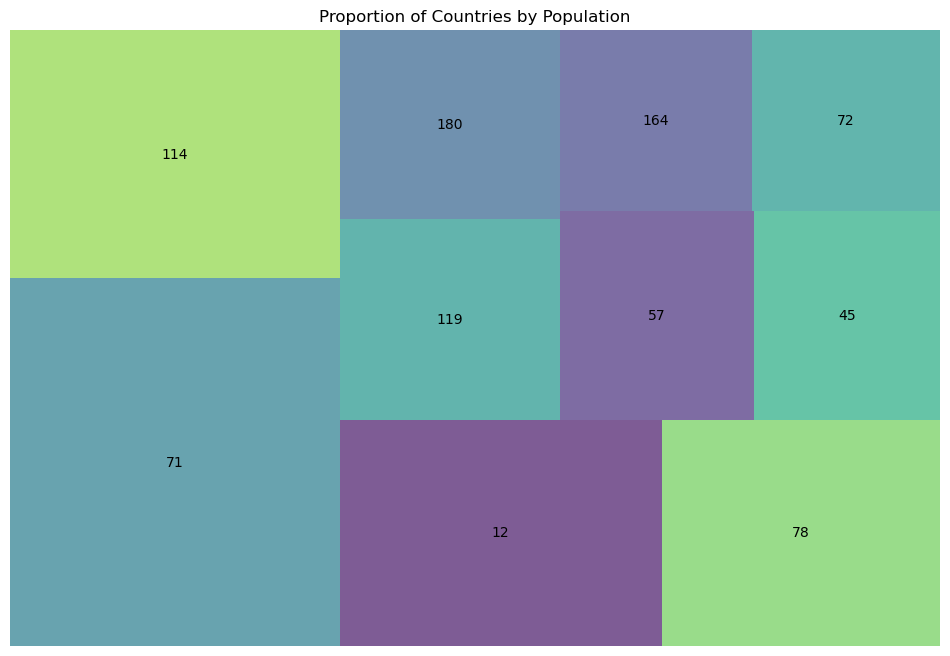

In [13]:
# Treemap: Proportion of countries by population
plt.figure(figsize=(12, 8))
squarify.plot(sizes=top_countries_by_population['Population'], label=top_countries_by_population['Country Name'], alpha=0.7)
plt.axis('off')
plt.title('Proportion of Countries by Population')
plt.show()

# 5. Splitting and Training the Data

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Convert target variable to categorical
bins = [0, 0.5, 0.7, 1]
labels = ['Low', 'Medium', 'High']
df_encoded['HDI_Category'] = pd.cut(df_encoded['Human Development Index'], bins=bins, labels=labels)

# Define features and target variable
X = df_encoded.drop(['Human Development Index', 'HDI_Category'], axis=1, errors='ignore')
y = df_encoded['HDI_Category'].dropna()

# Align X with y after dropping NaN rows
X = X.loc[y.index]

In [15]:


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6. Vll load the model

In [16]:

# Define and train the classification model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Check if the model has been fitted
if hasattr(model, 'estimators_'):
    print("Model has been successfully fitted.")

Model has been successfully fitted.


# 7. Evaluating the model

In [17]:
# Evaluate the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [18]:

# Ensure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Check if accuracy is below a threshold
if accuracy < 0.75:
    print("Consider changing the algorithm or tuning hyperparameters.")
else:
    print("Model accuracy is satisfactory.")

Accuracy: 81.08%
Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.95      0.91        22
         Low       1.00      0.25      0.40         4
      Medium       0.67      0.73      0.70        11

    accuracy                           0.81        37
   macro avg       0.85      0.64      0.67        37
weighted avg       0.83      0.81      0.79        37

Confusion Matrix:
[[21  0  1]
 [ 0  1  3]
 [ 3  0  8]]
Model accuracy is satisfactory.


# 8. Save the Predictive Model

In [19]:
import joblib 

# Define and train the classification model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to random_forest_model.pkl


In [20]:
loaded_model = joblib.load(model_filename)


# 9. Deploy the Model

In [23]:


# Get the best model
import joblib
from flask import Flask, request, jsonify



# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')

# Load the model
model = joblib.load('random_forest_model.pkl')

# Deploy using a web framework (example using Flask)
app = Flask(__name__)
print(f"Test accuracy: {accuracy}")



Test accuracy: 0.8108108108108109
